In [5]:
pip install tensorflow==1.15

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 MB 5.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.4/503.4 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 21.9 MB/s eta 0:00:0000:0100:01
  Using cached gast-0.2.2.tar.gz (10 kB)
  Preparing metadata (setup.py) ... done
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 24.5 MB/s eta 0:00:0000:0100:01
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached numpy-1.21.6-cp37-cp37m-macosx_10_9_x86_64.whl (16.9 MB)
  Using cached protobuf-4.24.4-cp37-abi3-macosx_10_9_universal2.whl (409 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.wh

In [7]:
pip install matplotlib

  Using cached matplotlib-3.5.3-cp37-cp37m-macosx_10_9_x86_64.whl (7.3 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-9.5.0-cp37-cp37m-macosx_10_10_x86_64.whl (3.4 MB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 901.3 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 3.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install protobuf==3.20.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 2.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install numpy pandas seaborn scipy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 19.5 MB/s eta 0:00:0000:0100:01
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import torch
import logging

from datasets import CategoricalDataset
from utils import create_categorical_gan, percentage_crosstab

NOISE_DIM = 10
HIDDEN_DIM = 20
SIGMA = 1


def generate_data():
    df = pd.DataFrame(
        {'weather': ['sunny']*10000+['cloudy']*10000+['rainy']*10000,
         'status': ['on time']*8000+['delayed']*2000
         + ['on time']*3000+['delayed']*5000+['canceled']*2000
         + ['on time']*2000+['delayed']*4000+['canceled']*4000}
    )
    return df


def create_synthetic_data():
    torch.manual_seed(123)
    # set logging level to INFO to display training
    logging.basicConfig(level=logging.INFO)
    real_data = generate_data()
    dataset = CategoricalDataset(real_data)
    data_tensor = dataset.to_onehot_flat()

    gan = create_categorical_gan(NOISE_DIM, HIDDEN_DIM, dataset.dimensions)
    gan.train(data=data_tensor,
              epochs=20,
              n_critics=5,
              batch_size=128,
              learning_rate=1e-3,
              weight_clip=1/HIDDEN_DIM,
              sigma=SIGMA)
    flat_synth_data = gan.generate(len(real_data))
    synth_data = dataset.from_onehot_flat(flat_synth_data)
    print('Real data crosstab:')
    print(percentage_crosstab(real_data['weather'], real_data['status']))
    print('Synthetic data crosstab:')
    print(percentage_crosstab(synth_data['weather'], synth_data['status']))

In [2]:
create_synthetic_data()

INFO:dpwgan:Epoch 0
Discriminator loss: -0.001735825091600418; Generator loss: 0.03981136903166771
INFO:dpwgan:Epoch 1
Discriminator loss: -0.007065635174512863; Generator loss: 0.03365468233823776
INFO:dpwgan:Epoch 2
Discriminator loss: -0.009169500321149826; Generator loss: 0.03269438445568085
INFO:dpwgan:Epoch 3
Discriminator loss: -0.010029368102550507; Generator loss: 0.03077443316578865
INFO:dpwgan:Epoch 4
Discriminator loss: -0.009473798796534538; Generator loss: 0.00013915915042161942
INFO:dpwgan:Epoch 5
Discriminator loss: -0.0013998654903843999; Generator loss: 0.004061561543494463
INFO:dpwgan:Epoch 6
Discriminator loss: 9.62461344897747e-05; Generator loss: -0.006236698478460312
INFO:dpwgan:Epoch 7
Discriminator loss: -0.002480353694409132; Generator loss: -0.003462218912318349
INFO:dpwgan:Epoch 8
Discriminator loss: -0.002222741022706032; Generator loss: -0.013389471918344498
INFO:dpwgan:Epoch 9
Discriminator loss: 0.0003453083336353302; Generator loss: -0.02823074720799923

Real data crosstab:
status   canceled  delayed  on time
weather                            
cloudy       20.0     50.0     30.0
rainy        40.0     40.0     20.0
sunny         0.0     20.0     80.0
Synthetic data crosstab:
status    canceled    delayed    on time
weather                                 
cloudy   22.012638  48.524003  29.463359
rainy    43.144005  42.294894  14.561102
sunny     2.377832  24.723834  72.898334


In [ ]:
import logging
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset

from utils import create_mnist_gan, estimate_epochs_from_sample

# Parameters for GAN
noise_dim = 100
image_channels = 1  # Grayscale images
image_size = 28     # Original MNIST image size is 28x28

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalizing the images
])
mnist_dataset = datasets.MNIST(root='./mnist_data', train=True, transform=transform, download=True)
large_dataset = Subset(mnist_dataset, range(12000))
dataloader = DataLoader(large_dataset, batch_size=64, shuffle=True)

# Create the GAN (adjust architecture and noise function as needed)
gan = create_mnist_gan(noise_dim)

estimated_epochs = estimate_epochs_from_sample(dataloader)

data_tensor = torch.cat([images for images, _ in dataloader], dim=0)
logging.basicConfig(level=logging.INFO)
gan.train(data=data_tensor,
          epochs=5,
          n_critics=5,
          batch_size=64,
          learning_rate=1e-4,
          weight_clip=0.01,
          sigma=1)  # sigma can be set for differential privacy, if desired

# Generate synthetic images
num_synthetic_images = 5
synthetic_images = gan.generate(num_synthetic_images)
synthetic_images

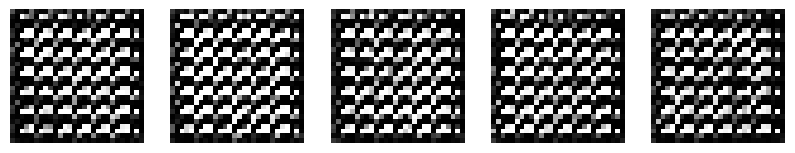

In [4]:
import matplotlib.pyplot as plt

def show_images(images, num_images=5):
    num_images = min(num_images, len(images))  # Adjust to the number of images available
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    if num_images == 1:  # If there's only one image, axes will not be an array
        axes = [axes]
    for i, ax in enumerate(axes):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.axis('off')
    plt.show()

# Assuming synthetic_images is a tensor of shape [num_synthetic_images, 1, 28, 28]
# and the values are normalized between -1 and 1
synthetic_images = (synthetic_images + 1) / 2  # Rescale images to range [0, 1]

show_images(synthetic_images.cpu().detach())

In [20]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 MB 7.6 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


262144


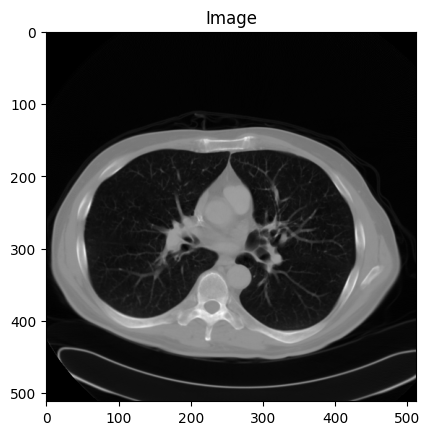

In [5]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "CT_Medical_Images_data/tiff_images/ID_0000_AGE_0060_CONTRAST_1_CT.tif"
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

# Convert from BGR to RGB (if it's a color image)
if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
print(image.size)

# Display the image
plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
plt.title("Image")
plt.show()

In [6]:
from torchvision import transforms
from torch.utils.data import DataLoader, Subset
import os
from datasets import ImageDataset_ResNet
from utils import build_gan_for_image_size_pretrained

# Set your dataset directory
dataset_directory = "CT_Medical_Images_data/tiff_images"

# Create the dataset
dataset = ImageDataset_ResNet(
    directory=dataset_directory,
    grayscale=True,  # Assuming medical images are grayscale
    resize_and_pad_to_power_of_two=True  # or resize_to_224=True for ResNet compatibility
)

subset_data = Subset(dataset, range(15))

# Create a DataLoader
data_loader = DataLoader(subset_data, batch_size=64, shuffle=True)

In [30]:
import logging
import torch

# Set the image size (e.g., 224 for ResNet compatibility or the power of two size)
transformed_image_size = dataset.get_transformed_image_size()

# Build the GAN
gan = build_gan_for_image_size_pretrained(
    image_size=transformed_image_size,
    noise_dim=100,
    image_channels=1,  # Set to 1 for grayscale images
    use_pretrained=True
)

data_tensor = torch.cat([images for images in data_loader], dim=0)

logging.basicConfig(level=logging.INFO)
gan.train(
    data_tensor,
    epochs=10,
    n_critics=5,
    batch_size=64,
    learning_rate=1e-4,
    sigma=0.1,  # Adjust for differential privacy needs
    weight_clip=0.01
)